In [562]:
#Dependancies

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import numpy as np


In [563]:
# Show all rows in the dataframe to inspect data
# pd.set_option('display.max_rows', None)

df_a = pd.read_csv("./Resources/tech_layoffs.csv")

df_a.head(20)


,#,Company,Location_HQ,Country,Continent,Laid_Off,Date_layoffs,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Industry,Stage,Money_Raised_in_$_mil,Year,lat,lng
0,1171,Google,San Francisco Bay Area,USA,North America,12000,2023-01-20 00:00:00 UTC,6.000000,200000,188000,Consumer,Post-IPO,$26,2023,37.38605,-122.08385
1,1654,Meta,San Francisco Bay Area,USA,North America,11000,2022-11-09 00:00:00 UTC,13.000000,84615,73615,Consumer,Post-IPO,$26000,2022,37.45383,-122.18219
2,846,Meta,San Francisco Bay Area,USA,North America,10000,2023-03-14 00:00:00 UTC,13.584117,73615,63615,Consumer,Post-IPO,$26000,2023,37.45383,-122.18219
3,1204,Microsoft,Seattle,USA,North America,10000,2023-01-18 00:00:00 UTC,5.000000,200000,190000,Other,Post-IPO,$1,2023,47.60621,-122.33207
4,1586,Amazon,Seattle,USA,North America,10000,2022-11-16 00:00:00 UTC,3.000000,333333,323333,Retail,Post-IPO,$108,2022,47.60621,-122.33207
5,829,Amazon,Seattle,USA,North America,9000,2023-03-20 00:00:00 UTC,2.295918,392000,383000,Retail,Post-IPO,$108,2023,47.60621,-122.33207
6,916,Ericsson,Stockholm,Sweden,Europe,8500,2023-02-24 00:00:00 UTC,8.000000,106250,97750,Other,Post-IPO,$663,2023,59.32938,18.06871
7,706,Flink,Berlin,Germany,Europe,8000,2023-04-24 00:00:00 UTC,40.000000,20000,12000,Food,Series B,$1000,2023,52.52437,13.41053
8,1346,Amazon,Seattle,USA,North America,8000,2023-01-04 00:00:00 UTC,2.000000,400000,392000,Retail,Post-IPO,$108,2023,47.60621,-122.33207
9,1347,SaleSan Franciscoorce,San Francisco Bay Area,USA,North America,8000,2023-01-04 00:00:00 UTC,10.000000,80000,72000,Sales,Post-IPO,$65,2023,37.77493,-122.41942


In [564]:
# Check data types
df_a.dtypes
print(df_a.dtypes)


#                                int64
Company                         object
Location_HQ                     object
Country                         object
Continent                       object
Laid_Off                         int64
Date_layoffs                    object
Percentage                     float64
Company_Size_before_Layoffs      int64
Company_Size_after_layoffs       int64
Industry                        object
Stage                           object
Money_Raised_in_$_mil           object
Year                             int64
lat                            float64
lng                            float64
dtype: object


In [565]:
# Convert Date_layoffs and Year to datetime
df_a['Date_layoffs'] = pd.to_datetime(df_a['Date_layoffs'])
df_a['Year'] = pd.to_datetime(df_a['Year'])
df_a.dtypes
print(df_a.dtypes)


#                                            int64
Company                                     object
Location_HQ                                 object
Country                                     object
Continent                                   object
Laid_Off                                     int64
Date_layoffs                   datetime64[ns, UTC]
Percentage                                 float64
Company_Size_before_Layoffs                  int64
Company_Size_after_layoffs                   int64
Industry                                    object
Stage                                       object
Money_Raised_in_$_mil                       object
Year                                datetime64[ns]
lat                                        float64
lng                                        float64
dtype: object


In [566]:
# Describe the data
df_a.describe()

,#,Laid_Off,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Year,lat,lng
count,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418,1418.000000,1418.000000
mean,1823.411848,267.392102,21.901584,3556.228491,3288.836389,1970-01-01 00:00:00.000002021,33.787884,-59.648503
min,3.000000,3.000000,0.044980,4.000000,0.000000,1970-01-01 00:00:00.000002020,-41.286640,-123.119340
25%,1038.500000,40.000000,10.000000,213.000000,151.250000,1970-01-01 00:00:00.000002022,34.052230,-122.272333
50%,1882.500000,86.000000,15.000000,531.000000,430.000000,1970-01-01 00:00:00.000002022,37.774930,-79.398640
75%,2616.250000,200.000000,27.000000,1414.750000,1200.000000,1970-01-01 00:00:00.000002023,42.331430,-0.125740
max,3290.000000,12000.000000,100.000000,400000.000000,392000.000000,1970-01-01 00:00:00.000002024,60.169520,174.775570
std,922.671427,877.468380,20.661776,22478.365010,21878.258702,NaN,18.813799,74.471053


In [567]:
df_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1418 entries, 0 to 1417
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype              
---  ------                       --------------  -----              
 0   #                            1418 non-null   int64              
 1   Company                      1418 non-null   object             
 2   Location_HQ                  1418 non-null   object             
 3   Country                      1418 non-null   object             
 4   Continent                    1418 non-null   object             
 5   Laid_Off                     1418 non-null   int64              
 6   Date_layoffs                 1418 non-null   datetime64[ns, UTC]
 7   Percentage                   1418 non-null   float64            
 8   Company_Size_before_Layoffs  1418 non-null   int64              
 9   Company_Size_after_layoffs   1418 non-null   int64              
 10  Industry                     1418 non-null   obj

In [568]:
# Clean the data
# Check for duplicates in the Company column sorted by Date_layoffs
duplicated_df = df_a.duplicated(subset=['Company']).sum()

# List all duplicates in the Country column sorted by Date_layoffs

#duplicated = df_a[df_a.duplicated(subset=['Company'])]
duplicated_df = df_a[df_a.duplicated(subset=['Company'])].sort_values(by='Date_layoffs')
 # duplicated_df
# Show the duplicated data
print(duplicated_df)




         #                Company             Location_HQ         Country  \
175   3237                Compass           New York City             USA   
918   3219            WanderJaunt  San Francisco Bay Area             USA   
354   3187              DataRobot                  Boston             USA   
1248  3136          Aqua Security                Tel Aviv          Israel   
292   3101                Katerra  San Francisco Bay Area             USA   
1264  3118             TripleLift           New York City             USA   
896   3083                Salsify                  Boston             USA   
295   3049                 Redfin                 Seattle             USA   
1278  3035               VideoAmp             Los Angeles             USA   
1186  3033              Quantcast  San Francisco Bay Area             USA   
334   3026                 Meesho               Bengaluru           India   
694   3016             Matterport  San Francisco Bay Area             USA   

In [569]:
# Verifying no Null values
df_a.isnull().sum()
print(df_a.isnull().sum())


#                              0
Company                        0
Location_HQ                    0
Country                        0
Continent                      0
Laid_Off                       0
Date_layoffs                   0
Percentage                     0
Company_Size_before_Layoffs    0
Company_Size_after_layoffs     0
Industry                       0
Stage                          0
Money_Raised_in_$_mil          0
Year                           0
lat                            0
lng                            0
dtype: int64


In [587]:
# Group by Stage and count the number of Layoffs
stage_group_df = df_a.groupby('Stage')['Laid_Off'].count()
stage_group_df

Stage
Acquired             77
Post-IPO            312
Private Equity …     25
Seed                 26
Series A             86
Series B            195
Series C            175
Series D            158
Series E             91
Series F             49
Series G             14
Series H             23
Series I              7
Series J              4
Subsidi…              3
Unknown             173
Name: Laid_Off, dtype: int64

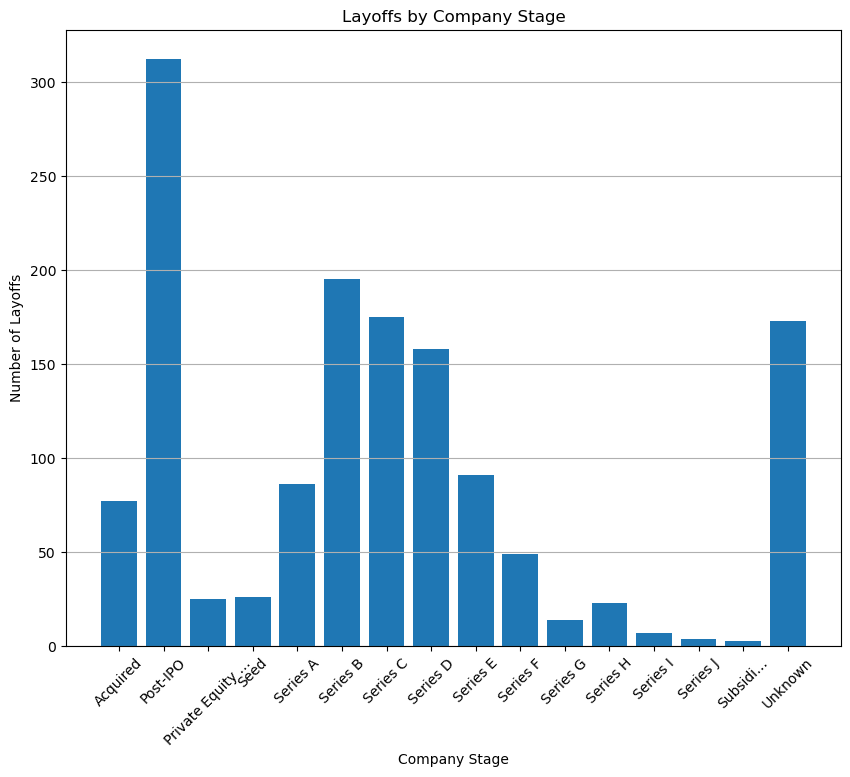

In [588]:
# Show number of layoffs using a bar chart

plt.figure (figsize=(10, 8))
plt.bar(stage_group_df.index, stage_group_df)
plt.xlabel('Company Stage')
plt.xticks(rotation=45)
plt.ylabel('Number of Layoffs')
plt.grid(axis = 'y')
plt.title('Layoffs by Company Stage')
plt.show()


In [572]:
# Group data by company stage and calculate summary statistics for layoffs
layoffs_summary = df_a.groupby('Stage')['Laid_Off'].describe()

# Print the summary statistics
print(layoffs_summary)

                  count        mean          std    min     25%    50%  \
Stage                                                                    
Acquired           77.0  253.675325   354.109203   12.0   60.00  120.0   
Post-IPO          312.0  701.884615  1685.008414   16.0  100.00  200.0   
Private Equity …   25.0  297.680000   610.036865   10.0   40.00  100.0   
Seed               26.0   45.307692    67.548364    3.0    8.25   20.0   
Series A           86.0   50.000000    61.996015    4.0   18.00   30.0   
Series B          195.0  118.753846   578.673528    5.0   30.00   50.0   
Series C          175.0   94.645714   126.594203   10.0   28.50   50.0   
Series D          158.0  118.139241   113.464687    9.0   46.25   87.5   
Series E           91.0  168.098901   288.830287   14.0   65.00  100.0   
Series F           49.0  173.367347   198.390891   20.0   80.00  120.0   
Series G           14.0  309.928571   373.689189   60.0  100.50  207.5   
Series H           23.0  310.043478   

In [573]:
# Testing to determine if there is a relationship between the number of layoffs and the company stage
# Group data by company stage
stage_group = [df_a[df_a['Stage'] == stage]['Laid_Off'] for stage in stage_group_df.index]



In [574]:
# Perform the ANOVA (Analysis of Variance) test. F-statistic and p-value are returned
# F-statistic is a measure of the variance between the group means and the variance within the groups.
# A large F-statistic indicates a large variance between the group means and a small variance within the groups.
# A small p-value indicates that the observed variance is unlikely to occur by chance.

f_stat, p_value = f_oneway(*stage_group)

In [575]:
# Set significance level. If p-value is less than alpha, reject the null hypothesis.
# A common significance level is 0.05

alpha = 0.05

# Test the hypothesis. If p-value is less than alpha, reject the null hypothesis
if p_value < alpha:
    print(f'The p-value is {p_value}. There is a significant difference between the number of layoffs by company stage.')
else:
    print(f'The p-value is {p_value}. There is no significant difference between the number of layoffs by company stage.')

The p-value is 2.866118251502934e-16. There is a significant difference between the number of layoffs by company stage.


In [576]:
# Show the ANOVA results
print(f'F-statistic: {f_stat}, p-value: {p_value}')

F-statistic: 7.498982730116828, p-value: 2.866118251502934e-16


Because the p-value is significantly smaller than the .05 significance level, there is good evidence that the company stage does have an impact on the number of layoffs.

In [577]:
# Group data by company stage and count the unique values in the Percentage column

stage_count_df = df_a.groupby('Stage')['Percentage'].count()
stage_count_df
print(stage_count_df.index)


Index(['Acquired', 'Post-IPO', 'Private Equity …', 'Seed', 'Series A',
       'Series B', 'Series C', 'Series D', 'Series E', 'Series F', 'Series G',
       'Series H', 'Series I', 'Series J', 'Subsidi…', 'Unknown'],
      dtype='object', name='Stage')


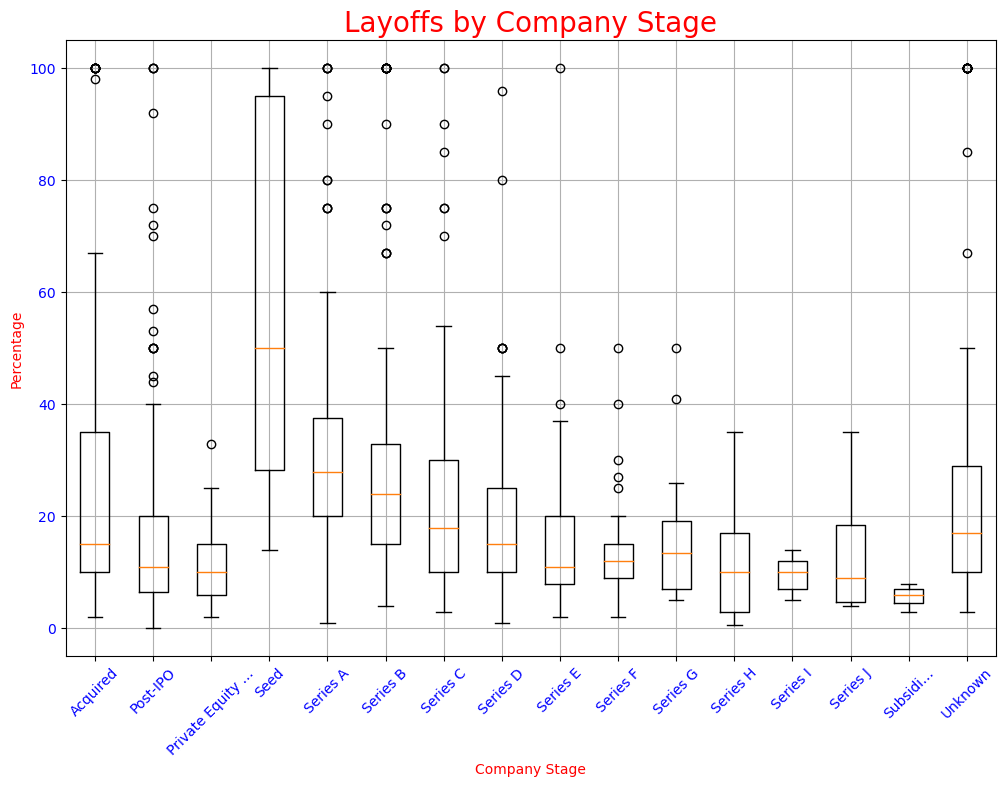

In [584]:
# Show the percentages of layoffs by company stage using a box plot

plt.figure (figsize=(12, 8))
plt.boxplot([df_a[df_a['Stage'] == stage]['Percentage'] for stage in stage_count_df.index], labels=stage_count_df.index)
plt.xlabel('Company Stage', color = 'red')
plt.xticks(rotation=45)
plt.xticks(color='blue')
plt.ylabel('Percentage', color = 'red')
plt.yticks(color='blue')
plt.grid(True)
plt.title('Layoffs by Company Stage', color = 'red', fontsize = 20)
plt.show()

In [552]:
# Group data by company stage and calculate the average percentage of layoffs

average_percentage_by_stage = df_a.groupby('Stage')['Percentage'].mean()
print(average_percentage_by_stage)

Stage
Acquired            28.393939
Post-IPO            15.325709
Private Equity …    12.040000
Seed                55.576923
Series A            33.593023
Series B            29.338462
Series C            22.411429
Series D            18.253165
Series E            15.963370
Series F            13.571429
Series G            16.857143
Series H            11.196265
Series I             9.605868
Series J            14.250000
Subsidi…             5.666667
Unknown             24.127573
Name: Percentage, dtype: float64


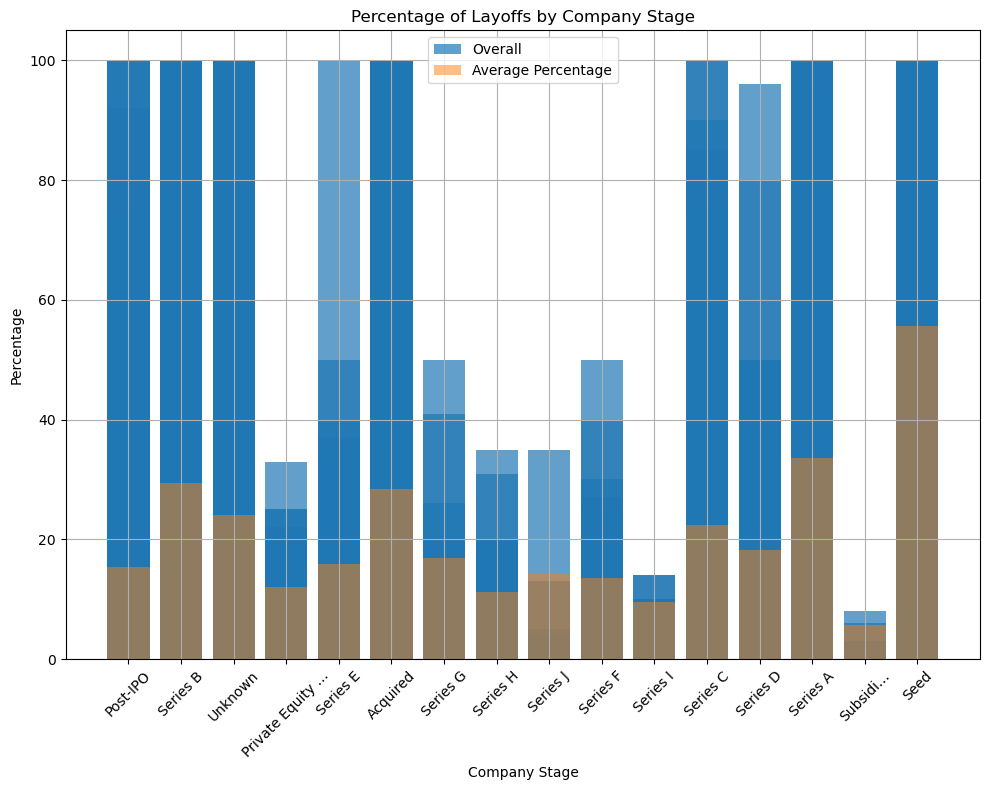

In [554]:
# Show the average percentage of layoffs by company stage using a bar chart

plt.figure(figsize=(10, 8))
plt.bar(df_a['Stage'], df_a['Percentage'], alpha=0.7, label='Overall')
average_percentage_by_stage = df_a.groupby('Stage')['Percentage'].mean()
plt.bar(average_percentage_by_stage.index, average_percentage_by_stage.values, alpha=0.5, label='Average Percentage')
plt.xlabel('Company Stage')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.title('Percentage of Layoffs by Company Stage')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

The Post_IPO companies had the largest number of layoffs, but not the largest percentage. Seed-stage funded and start-up companies were disproportinately affected over the last four years.